# INF8111 - Fouille de données / Data Mining
## Été 2024 - TP2 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
    - Gervais Presley Koyaweda  (2305686) 

## Instructions de remise / Submission

Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP2\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Ce notebook être remis avant le **02 juin 2024 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 10 points

Partie 2: 6 points

Partie 3: 4 points

Pour un total de 20 points.


---

## Submission

You must put back in the submission box on moodle:

1. this file renamed TP2\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **June 2nd 2024 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 10 points

Part 2: 6 points

Part 3: 4 points

For a total of 20 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de nos vies. Tout au long de sa,vie, chaque personne appartient à différentes communautés. Avec la récupération de ces informations par les différents réseaux sociaux, les data-analystes ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec de nombreux impacts, notamment sur la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse de réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.

---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parts, we provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (10 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour regrouper les personnes dans des communautés selon leurs liens. 

## LPAm+
Dans cette partie, vous devez implémenter l'algorithme LPAm+ pour détecter les communautés parmi les personnages de l'univers cinématographique Marvel (MCU, en anglais). Vous devez utiliser les CSVs *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut fusionner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'il peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser la librairie networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of the Marvel Cinematic Universe (MCU). You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [228]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages

!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user networkx

In [406]:
# vérifier si les libraries sont bien installés

import networkx
print('networkx: {}'.format(networkx.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

networkx: 3.1
matplotlib: 3.8.0


In [417]:
import pandas as pd
import networkx as nx
import numpy as np
import random
from itertools import combinations
from tqdm import tqdm

random.seed(42)
np.random.seed(42)

class LPAmPlus:
    """
    Constructor
    """
    
    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        """
        labels gives all the communities present in the network
        """
        """
        Assign a label to each node
        """
        
        self.graph = graph
        self.labels = {}
        self.assign_initial_labels()

    def assign_initial_labels(self):
        for node in self.graph.nodes():
            self.labels[node] = node
            self.graph.nodes[node]['label'] = node

    def label_evaluation(self, current_node, new_label):
        """
        Term to optimize when replacing labels
        """
        m = self.graph.number_of_edges()
        B = nx.linalg.modularity_matrix(self.graph)
        node_indices = {node: i for i, node in enumerate(self.graph.nodes())}

        x_index = node_indices[current_node]
        score = 0

        for u in self.graph.nodes():
            if u == current_node:
                continue
            u_index = node_indices[u]
            lu = self.graph.nodes[u].get('label', None)
            delta = 1 if lu == new_label else 0
            score += B[u_index, x_index] * delta

        return score
    
        """
        Function to choose the new label for a node
        """

    def update_label(self, current_node):
        labels = {self.graph.nodes[u].get('label', None) for u in self.graph.neighbors(current_node)}
        labels.discard(None)
        best_score = -np.inf
        best_labels = []

        for label in labels:
            score = self.label_evaluation(current_node, label)
            if score > best_score:
                best_score = score
                best_labels = [label]
            elif score == best_score:
                best_labels.append(label)

        if best_labels:
            new_label = random.choice(best_labels)
        else:
            new_label = self.graph.nodes[current_node].get('label', None)

        self.graph.nodes[current_node]['label'] = new_label
        self.labels[current_node] = new_label

    def run_algorithm(self, iterations=20):
        for _ in tqdm(range(iterations), desc="Iterations"):
            for node in tqdm(self.graph.nodes(), desc="Nodes", leave=False):
                self.update_label(node)
                
    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):
        m = self.graph.number_of_edges()
        B = nx.linalg.modularity_matrix(self.graph)
        Q = 0
        nodes = list(self.graph.nodes())
        node_indices = {node: i for i, node in enumerate(nodes)}

        for u in nodes:
            for v in nodes:
                i = node_indices[u]
                j = node_indices[v]
                lu = self.graph.nodes[u].get('label', None)
                lv = self.graph.nodes[v].get('label', None)
                delta = 1 if lu == lv else 0
                Q += B[i, j] * delta

        Q = Q / (2 * m)
        return Q
    
     
    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):
        prev_modularity = self.modularity()
        improvement = True

        while improvement:
            nodes = list(self.graph.nodes())
            random.shuffle(nodes)

            for node in tqdm(nodes, desc="Updating labels"):
                self.update_label(node)

            current_modularity = self.modularity()
            if current_modularity > prev_modularity:
                prev_modularity = current_modularity
            else:
                improvement = False
                
    """
    Function that find which communities to combine and combine them
    """

    def merge_communities(self):
        initial_modularity = self.modularity()
        best_modularity = initial_modularity
        best_pair = None
        
        communities = self.get_communities()
        for (comm1, comm2) in combinations(communities, 2):
            merged_graph = self.merge_two_communities(comm1, comm2)
            new_modularity = self.calculate_modularity(merged_graph)
            if new_modularity > best_modularity:
                best_modularity = new_modularity
                best_pair = (comm1, comm2)
        
        if best_pair:
            self.graph = self.merge_two_communities(best_pair[0], best_pair[1])
            return True
        return False

    def get_communities(self):
        communities = {}
        for node in self.graph.nodes():
            label = self.graph.nodes[node].get('label', None)
            if label not in communities:
                communities[label] = set()
            communities[label].add(node)
        return list(communities.values())

    def merge_two_communities(self, comm1, comm2):
        new_graph = self.graph.copy()
        new_label = min(new_graph.nodes[list(comm1)[0]]['label'], new_graph.nodes[list(comm2)[0]]['label'])
        for node in comm1.union(comm2):
            new_graph.nodes[node]['label'] = new_label
        return new_graph

    def calculate_modularity(self, graph):
        m = graph.number_of_edges()
        B = nx.linalg.modularity_matrix(graph)
        Q = 0
        nodes = list(graph.nodes())
        node_indices = {node: i for i, node in enumerate(nodes)}

        for u in nodes:
            for v in nodes:
                i = node_indices[u]
                j = node_indices[v]
                lu = graph.nodes[u].get('label', None)
                lv = graph.nodes[v].get('label', None)
                delta = 1 if lu == lv else 0
                Q += B[i, j] * delta

        Q = Q / (2 * m)
        return Q

    def find_communities(self):
        self.LPAm()
        while self.merge_communities():
            continue
        return self.get_communities()


In [418]:
path_sub="tp-marvel-dataset-subset.csv"
path="tp-marvel-dataset.csv"
path_villain='tp-marvel-villains.csv'

### 1.1 Dataset (1 point)

Nous vous avons fourni le fichier *`tp-marvel-dataset-subset.csv`* contenant l'ensemble des personnages de l'univers cinématographique Marvel. Vous devez maintenant créer un graphe reliant tous les personnages. Vous devez suivre les règles ci-dessous :

#### Mise en œuvre
1. Implémentez la fonction *`load_unweighted_network`*. Cette fonction retourne un graphe non orienté et non pondéré.
2. Chaque personnage est un nœud unique du graphe. Aucun personnage ne peut donc apparaître deux fois dans le graphe.
3. Tous les personnages d'un même film doivent être connectés.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un sous-ensemble de l'ensemble de données. Vous devriez obtenir un résultat semblable à celui-ci :

![titre](picture.png)

---
We have provided you with the a .CSV file, called *`tp-marvel-dataset-subset.csv`*, with all the characters from movies in the Marvel Cinematic Universe. You must now create a graph connecting all the characters. You should follow the rules below:

#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.
2. Each character must be a single node inside the graph. No character should appear twice in the graph. 
3. All characters in a same movie should be connected.

Use the function `test_load` to verify your implementation of the function. This test uses a subset of the whole dataset. You should obtain a result similar to this:

![title](picture.png)


In [419]:
import csv
import pandas as pd
import networkx as nx

def load_unweighted_network(source_csv):
    data = pd.read_csv(source_csv, sep=';')
    G = nx.Graph()
    for movie, group in data.groupby('Movie'):
        heroes = list(group['Hero_id'])
        for i in range(len(heroes)):
            for j in range(i + 1, len(heroes)):
                G.add_edge(heroes[i], heroes[j])
    return G

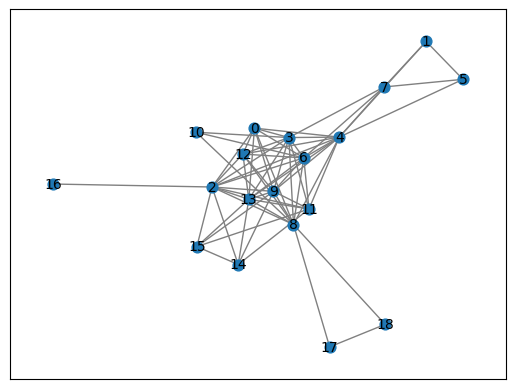

<Figure size 2000x2000 with 0 Axes>

In [420]:
import matplotlib.pyplot as plt

def test_load():
    network = load_unweighted_network(path_sub)
    nx.draw_networkx(network, node_size=60, font_size=10, edge_color = 'gray', font_color='black')
    plt.figure(figsize=(20,20))
    plt.show()

test_load()

In [421]:
df=pd.read_csv("tp-marvel-dataset-subset.csv",sep=';')
df

,Hero_id,Hero_name,Movie,Affiliation
0,0,Ant-Man,Ant-Man,Avengers
1,0,Ant-Man,Ant-Man and the Wasp,Avengers
2,0,Ant-Man,Ant-Man and the Wasp: Quantumania,Avengers
3,0,Ant-Man,Avengers: Endgame,Avengers
4,0,Ant-Man,Captain America: Civil War,Avengers
...,...,...,...,...
60,14,Xoliswa,Black Panther,Dora Milaje
61,15,Zuri,Black Panther,Unnafiliated
62,16,Nakia,Black Panther: Wakanda Forever,Unnafiliated
63,17,Sinister Strange,Doctor Strange in the Multiverse of Madness,Unnafiliated


### 1.2  Modularité / Modularity (1 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: nombre d'arêtes
- l: étiquette d'un sommet
- u, v: sommets du réseau
- B: matrice de modularité (chaque élément vaut $A_{uv} - P_{uv}$)
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: symbole de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les `nodes` agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.019.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.019.

In [422]:
def test_modularity():
    social_network = load_unweighted_network(path_sub)
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in range(0, 18):
        lpam.graph.nodes[i]['label'] = 0 if i < 10 else 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.005


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (2 points)

Comme mentionné plus haut, l'algorithme est basé sur une optimisation de la modularité. Il vous est demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme a la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction met à jour la nouvelle étiquette pour un sommet. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et modifie leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimum de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe avec la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.184 avec 5 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.184 with 5 communities.

In [423]:
def test_lpam():
    social_network = load_unweighted_network(path_sub)
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    
    five_communities=set(lpam.labels.values())
    
    print("Modularity: {:.3f}\nCommunities: {}\nFive Communities: {}".format(lpam.modularity(), lpam.labels,five_communities))

test_lpam()

Updating labels: 100%|██████████| 19/19 [00:00<00:00, 1366.39it/s]

Modularity: 0.184
Communities: {0: 0, 3: 6, 12: 0, 13: 14, 4: 5, 6: 6, 11: 14, 2: 14, 8: 18, 9: 14, 14: 14, 15: 14, 16: 14, 10: 6, 17: 18, 18: 18, 7: 5, 1: 5, 5: 5}
Five Communities: {0, 5, 6, 14, 18}


### 1.5 LPAm+ (2 points)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va réessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne puisse plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction évalue si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.204 et 3 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.204 and 3 communities.

In [424]:
def test_lpam_plus():
    social_network = load_unweighted_network(path_sub)
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    
    three_communities_groups = lpam.find_communities()
    
    print("Modularity: {:.3f}\nCommunities: {}\nThree Communities Groups: {}".format(lpam.modularity(), lpam.labels,three_communities_groups))

test_lpam_plus()

Updating labels: 100%|██████████| 19/19 [00:00<00:00, 951.77it/s]

Modularity: 0.204
Communities: {0: 0, 3: 0, 12: 0, 13: 14, 4: 1, 6: 0, 11: 14, 2: 14, 8: 0, 9: 14, 14: 14, 15: 14, 16: 14, 10: 0, 17: 0, 18: 0, 7: 1, 1: 1, 5: 1}
Three Communities Groups: [{0, 3, 6, 8, 10, 12, 17, 18}, {2, 9, 11, 13, 14, 15, 16}, {1, 4, 5, 7}]


### 1.6 MCU dataset (2 points)

Exécutez votre algorithme sur l'ensemble de données de caractères MCU complet (*`tp-marvel-dataset.csv`*) et comparez ce que vous obtenez avec les communautés réelles. Ces communautés réelles se trouvent dans la colonne Affiliation du csv.

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n : nombre de nœuds
- TP : Vrai positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats et dans la vérité terrain
- TN : Vrai négatif le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans la vérité terrain
- FP : Faux positif le nombre de paires d'éléments qui sont dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans la vérité terrain
- FN : Faux négatif le nombre de paires d'éléments qui sont dans des communautés différentes dans vos résultats mais qui sont dans la même communauté dans la vérité terrain

**N.B :** Ce qui compte ici, c'est la composition des communautés que vous avez trouvées, pas les noms. Un TP, c'est quand le nœud a et le nœud b sont tous les deux dans les mêmes communautés dans votre résultat et dans la vérité terrain.

Répondre aux questions suivantes. Ce sont des guides pour votre analyse.

- L'algorithme fonctionne-t-il bien ?
- Le manque de nombreuses communautés affecte-t-il les performances algorithmiques ?
- Comment le fait de connecter tous les personnages d'un film affecte-t-il les résultats ?
- Expliquez pourquoi vous avez obtenu ces résultats en analysant les communautés dans l'ensemble de données. Quelles particularités offrent de meilleurs résultats ou entravent l'algorithme ?

Vous pouvez faire les manipulations que vous souhaitez pour mieux présenter vos résultats et mieux étayer vos propos.

---

Run your algorithm over whole MCU characters dataset (*`tp-marvel-dataset.csv`*) and compare what you get and the real communities. The ground truth is found in the Affiliation column in the csv. 

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well?
- Does the lack of many communities affect the algorithmic performance?
- How does the fact of connecting all characters in a movie affect the results?
- Explain why you obtained those results by analysing the communities in the dataset. Which particularities offer better results, or hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [471]:
# Calculate the modularity
social_network = load_unweighted_network(path)
network = LPAmPlus(social_network)
network.find_communities()
unique_lbs = np.unique(network.labels)
communities_list=network.find_communities()
print("Modularity: {:.3f}\nCommunities: {}\n\nCommunities_list: {}\n".format(network.modularity(), np.unique(network.labels),communities_list))

grouped_nodes = {}
for node in network.graph.nodes:
    label = network.graph.nodes[node]['label']
    if label in grouped_nodes:
        grouped_nodes[label].add(node)
    else:
        grouped_nodes[label] = {node}

ground_truth = {}
df = pd.read_csv(path, sep=';')
grouped = df.groupby('Affiliation')
for affiliation, group_data in grouped:
    ground_truth[affiliation] = set(group_data['Hero_id'].tolist())

from itertools import combinations

TP = 0
TN = 0
FP = 0
FN = 0

for node1, node2 in combinations(network.graph.nodes, 2):
    if any(node1 in group and node2 in group for group in grouped_nodes.values()):
        if any(node1 in affiliation and node2 in affiliation for affiliation in ground_truth.values()):
            TP += 1
        else:
            FP += 1
    else:
        if not any(node1 in affiliation and node2 in affiliation for affiliation in ground_truth.values()):
            TN += 1
        else:
            FN += 1

RI = (TP + TN) / (TP + TN + FP + FN)


print(f"Rand Index (RI): {RI}\nTrue Positive (TP): {TP}\nTrue Negative (TN): {TN}\nFalse Positive (FP): {FP}\nFalse Negative (FN): {FN}")

Updating labels: 100%|██████████| 346/346 [00:11<00:00, 28.94it/s]


Modularity: 0.440
Communities: [{14: 60, 41: 102, 45: 60, 62: 60, 68: 60, 98: 60, 131: 60, 132: 102, 153: 60, 173: 60, 186: 60, 189: 60, 208: 60, 42: 102, 267: 60, 328: 60, 330: 102, 339: 60, 28: 60, 86: 60, 104: 60, 118: 60, 148: 60, 154: 60, 279: 60, 316: 60, 46: 60, 60: 60, 66: 60, 137: 60, 151: 60, 160: 60, 171: 60, 183: 245, 209: 60, 242: 60, 243: 60, 318: 60, 320: 60, 32: 7, 57: 102, 89: 245, 92: 72, 121: 102, 123: 245, 126: 102, 134: 7, 139: 72, 142: 7, 175: 102, 178: 102, 195: 102, 226: 102, 297: 102, 302: 245, 313: 326, 314: 102, 322: 102, 327: 7, 6: 102, 9: 102, 11: 102, 31: 102, 38: 102, 43: 7, 58: 102, 61: 102, 77: 21, 81: 102, 93: 102, 96: 245, 99: 21, 114: 21, 119: 102, 120: 72, 143: 102, 150: 102, 168: 245, 169: 21, 187: 102, 193: 21, 200: 72, 204: 245, 211: 102, 223: 102, 224: 21, 225: 72, 233: 102, 241: 102, 244: 102, 249: 102, 257: 21, 266: 102, 274: 102, 281: 72, 284: 21, 286: 326, 296: 102, 317: 245, 321: 72, 332: 326, 22: 102, 54: 72, 84: 102, 228: 102, 262: 72, 29

#### Analyse / Analysis



1. **L'algorithme fonctionne-t-il bien ?**

   L'algorithme semble fonctionner de manière acceptable, mais il y a des aspects qui indiquent qu'il pourrait être amélioré. La modularité de 0.440 montre que l'algorithme a réussi à identifier des communautés significatives dans les données. Cependant, les métriques d'évaluation comme le Rand Index (RI = 0.330) et les valeurs de TP (6159) et FN (37365) indiquent qu'il y a encore beaucoup de nœuds mal classifiés. Le nombre élevé de faux négatifs suggère que de nombreux nœuds qui devraient être dans les mêmes communautés ne le sont pas.

2. **Le manque de nombreuses communautés affecte-t-il les performances algorithmiques ?**

   Oui, le manque de nombreuses communautés peut affecter les performances algorithmiques. Si l'algorithme ne parvient pas à identifier toutes les communautés présentes dans les données, cela peut conduire à une mauvaise classification des nœuds. Le résultat est une faible précision dans la détection des communautés, ce qui est reflété par le nombre élevé de faux négatifs et faux positifs.

3. **Comment le fait de connecter tous les personnages d'un film affecte-t-il les résultats ?**

   Connecter tous les personnages d'un film peut fausser les résultats en créant des communautés artificielles. Si les personnages sont trop fortement connectés, l'algorithme peut les regrouper dans une seule communauté, même si, dans la réalité, ils appartiennent à des sous-communautés distinctes. Cela peut augmenter les faux positifs, car des nœuds qui ne devraient pas être dans la même communauté sont regroupés ensemble.

4. **Expliquez pourquoi vous avez obtenu ces résultats en analysant les communautés dans l'ensemble de données. Quelles particularités offrent de meilleurs résultats ou entravent l'algorithme ?**

   Les résultats obtenus peuvent être attribués à plusieurs facteurs :
   - **Densité des connexions** : Si certains personnages sont connectés à presque tous les autres, cela peut entraîner une surconnexion et fausser la détection des communautés réelles.
   - **Taille des communautés** : Les communautés de taille disproportionnée peuvent affecter la modularité et la précision de l'algorithme. De grandes communautés peuvent englober des sous-communautés, tandis que de petites communautés peuvent ne pas être détectées.
   - **Distribution des liens** : Une distribution inégale des liens entre les nœuds peut conduire à des résultats biaisés. Les nœuds avec un nombre disproportionné de connexions peuvent dominer les communautés.
   - **Qualité des données** : La présence de données bruyantes ou de liens non pertinents peut fausser les résultats.

### Conclusion

L'algorithme a une performance moyenne pour la détection des communautés dans cet ensemble de données. Il identifie certaines structures communautaires significatives, mais le nombre élevé de faux négatifs et faux positifs indique qu'il y a encore des améliorations possibles.

# 2. Social network analysis (6 points)

Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau, c'est-à-dire les personnes autour desquelles les personnes du réseau se regroupent.

Il y a des mesures qui permettent de connaître ces personnes : les mesures de centralité. **Vous devez implémenter ces métriques vous-mêmes. N'utilisez pas l'implémentation `networkx` pour le tp.** Utilisez le dataset Marvel complet. 

---

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** Use the whole Marvel dataset. 



## 2.1 Centralité de degré / Degree centrality (2 points)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule selon la formule suivante $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

2. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.48.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.
2. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.48.

In [472]:
def calculate_degree_centrality(social_network):
 
    n = len(social_network)
    degree_centrality = {}
    
    for node in social_network:
        degree = len(social_network[node])
        centrality = degree / (n - 1)
        degree_centrality[node] = centrality
    
    return degree_centrality

def top_n_centralities(degree_centrality, n=10):
 
    sorted_nodes = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
    return sorted_nodes[:n]

social_network=load_unweighted_network(source_csv=path)

degree_centrality = calculate_degree_centrality(social_network)
top_10 = top_n_centralities(degree_centrality, 10)

print("Centralités de degré :\n", degree_centrality)
print('***************************************************************************************************************************')
print("Top 10 centralités :\n", top_10)

Centralités de degré :
 {14: 0.2956521739130435, 41: 0.48405797101449277, 45: 0.26956521739130435, 62: 0.09565217391304348, 68: 0.07246376811594203, 98: 0.04927536231884058, 131: 0.04927536231884058, 132: 0.3101449275362319, 153: 0.07246376811594203, 173: 0.07246376811594203, 186: 0.07246376811594203, 189: 0.07246376811594203, 208: 0.04927536231884058, 42: 0.34202898550724636, 267: 0.04927536231884058, 328: 0.26956521739130435, 330: 0.34782608695652173, 339: 0.04927536231884058, 28: 0.043478260869565216, 86: 0.043478260869565216, 104: 0.043478260869565216, 118: 0.25507246376811593, 148: 0.25507246376811593, 154: 0.08405797101449275, 279: 0.043478260869565216, 316: 0.043478260869565216, 46: 0.05507246376811594, 60: 0.05507246376811594, 66: 0.05507246376811594, 137: 0.05507246376811594, 151: 0.05507246376811594, 160: 0.05507246376811594, 171: 0.05507246376811594, 183: 0.3536231884057971, 209: 0.05507246376811594, 242: 0.05507246376811594, 243: 0.05507246376811594, 318: 0.0550724637681159

## 2.2 Centralité de proximité / Closeness centrality (2 points)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule avec la formule suivante $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour le plus grand composant connexe. À titre indicatif, la centralité la plus élevée devrait être de 0.67.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the largest connected component. As a hint, the highest centrality should be 0.67.

In [473]:
def calculate_closeness_centrality(social_network):
    
    #les composants connectés
    components=list(nx.connected_components(social_network))
    
    closeness_centrality={}
    
    for component in components:
        subgraph=social_network.subgraph(component)#sous-graphe pour chaque composant
        
        #calcul de la centralité
        for node in subgraph.nodes():
            shortest_paths = nx.shortest_path_length(subgraph, source=node)
            total_distance = sum(shortest_paths.values())
            if total_distance > 0:
                closeness_centrality[node] = (len(subgraph.nodes()) - 1) / total_distance
            else:
                closeness_centrality[node]=0
                
    # Ajout de la centralité de proximité à chaque sommet dans le graphe original
    nx.set_node_attributes(social_network,closeness_centrality,'closeness_centrality')
    
    return closeness_centrality

In [474]:
def print_top_10_closeness_centrality(social_network):
    
    # Trouve le plus grand composant connexe
    largest_component = max(nx.connected_components(social_network), key=len)
    subgraph = social_network.subgraph(largest_component)
    
    # Trie les sommets par leur centralité de proximité
    sorted_closeness = sorted(subgraph.nodes(data=True), key=lambda x: x[1]['closeness_centrality'], reverse=True)
    
    # Affiche les 10 centralités les plus élevées
    for node, data in sorted_closeness[:10]:
        print(f"Node {node}: Closeness Centrality = {data['closeness_centrality']:.4f}")


social_network = load_unweighted_network(path)
closeness_centrality = calculate_closeness_centrality(social_network)

print('TOP 10 CLOSENESS CENTRALITY :\n')
print_top_10_closeness_centrality(social_network)

TOP 10 CLOSENESS CENTRALITY :

Node 41: Closeness Centrality = 0.6708
Node 139: Closeness Centrality = 0.6444
Node 32: Closeness Centrality = 0.6406
Node 226: Closeness Centrality = 0.6381
Node 332: Closeness Centrality = 0.6224
Node 134: Closeness Centrality = 0.6212
Node 120: Closeness Centrality = 0.6200
Node 286: Closeness Centrality = 0.6165
Node 321: Closeness Centrality = 0.6165
Node 183: Closeness Centrality = 0.6142


## 2.3 Centralité d'intermédiarité / Betweeness centrality (2 points)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule avec cette formule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: la proportion des chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

**NB**: Utilisez les fonctions `all_shortest_paths()` ou `shortest_path()` de Networkx pour calculer des chemins simples les plus courts du graphe.

2. L'ensemble de données a deux composants connectés. Utilisez la fonction `nx.connected_components` pour obtenir chacun d'eux. Calculez la centralité de proximité pour chaque composante et expliquez vos résultats.

3. Affichez les 10 centralités les plus élevées pour l'ensemble de données MCU. À titre indicatif, la centralité la plus élevée devrait être de 0.073.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the proportion of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

**NB**: Use the functions `all_shortest_paths()` or `shortest_path()` from Networkx to compute the shortest simple paths in the graph.

2. The dataset has two connected components. Use the function `nx.connected_components` to get each one of them. Calculate the closeness centrality for each component, and explain your results. 

3. Show the highest 10 centralities for the MCU dataset. As a hint, the highest centrality should be 0.073.

In [475]:
import networkx as nx
from tqdm import tqdm

def calculate_betweenness_centrality(social_network, progress_bar):
    betweenness_centrality = {}

    for node in social_network.nodes():
        betweenness_centrality[node] = 0

    components = list(nx.connected_components(social_network))

    for component in components:
        subgraph = social_network.subgraph(component)
        n = len(subgraph.nodes())
        if n > 2:
            component_centrality = nx.betweenness_centrality(subgraph)
            
            for node, centrality in component_centrality.items():
                betweenness_centrality[node] += centrality
            progress_bar.update(len(component) * (len(component) - 1) // 2)

    return betweenness_centrality


In [476]:

def print_top_10_centrality(betweenness):
    top_10 = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, centrality in top_10:
        print(f"Node {node}: Betweenness Centrality = {centrality:5f}")

In [477]:
social_network = load_unweighted_network(path)

#j'ai juste besoin d'une seule barre pour voir la progression du calcul
total_iterations = sum(len(c) * (len(c) - 1) // 2 for c in nx.connected_components(social_network))
progress_bar = tqdm(total=total_iterations, desc="Calculating Betweenness")

betweenness = calculate_betweenness_centrality(social_network, progress_bar)

progress_bar.close()

print('TOP 10 BETWEENNESS CENTRALITY :\n')
print_top_10_centrality(betweenness)
print('\n')
print('BETWEENNESS CENTRALITY :\n')
print(betweenness)

Calculating Betweenness: 100%|██████████| 54092/54092 [00:01<00:00, 31992.46it/s]

TOP 10 BETWEENNESS CENTRALITY :

Node 41: Betweenness Centrality = 0.073788
Node 32: Betweenness Centrality = 0.059036
Node 332: Betweenness Centrality = 0.049504
Node 139: Betweenness Centrality = 0.040054
Node 134: Betweenness Centrality = 0.038428
Node 286: Betweenness Centrality = 0.037592
Node 226: Betweenness Centrality = 0.036887
Node 42: Betweenness Centrality = 0.033559
Node 183: Betweenness Centrality = 0.031886
Node 43: Betweenness Centrality = 0.031499


BETWEENNESS CENTRALITY :

{14: 0.023495478672239663, 41: 0.07378780938778137, 45: 0.019075338666998332, 62: 0.0013753877229822288, 68: 0.0004990007319658463, 98: 0.0, 131: 0.0, 132: 0.019156363279674325, 153: 0.0004990007319658463, 173: 0.0004990007319658463, 186: 0.0004990007319658463, 189: 0.0004990007319658463, 208: 0.0, 42: 0.03355909317676028, 267: 0.0, 328: 0.019075338666998332, 330: 0.025646493686018026, 339: 0.0, 28: 0.0, 86: 0.0, 104: 0.0, 118: 0.01664046310284593, 148: 0.01664046310284593, 154: 0.00046234473924786

# 3. Méchants MCU/MCU Villains (4 points)

L'univers cinématographique Marvel est connu pour avoir des méchants très notables. Nous vous demandons de construire un modèle pour suivre ces méchants. Vos fonctionnalités doivent être chaque film dans lequel les personnages ont été et les mesures de centralité calculées auparavant.

---

The Marvel Cinematic Universe is known to have very notable villains. We ask you to build a model to track those villains. Your features should be each movie that the characters have been in, and the centrality measures calculated before. 

## 3.1. Création du ensemble de données/Creating the dataset (2 points)

À partir de la liste des films fournis, créez des features à partir de la colonne `Movie` afin d'entraîner votre jeu de données, et fusionner ces valeurs avec les centralités, pour chaque personnage. Utilisez la méthode de votre choix dans ce processus.

Les centralités étant très variables, mieux vaut normaliser chaque mesure. Sélectionnez une méthode de votre choix pour ramener toutes les mesures à une seule échelle.

Utilisez le fichier .CSV *`tp-marvel-villains.csv`* comme principale source d'indication si un personnage est un méchant. Fusionnez ce fichier dans l'ensemble de données global en tant qu'étiquette Mechant (la feature `y`).

---

From the list of movies given, create features from the column `Movie` so as to train your dataset, and merge these values ​​with the centralities, for each character.. Use any method of your choice in this process.

As the centralities vary greatly, it is better to normalize each measure. Select a method of your choice to bring all of the measures to a single scale.  

Use the .CSV file *`tp-marvel-villains.csv`* as the main source of indication whether a character is a villain. Merge this file into the overall dataset as the Villain label (the `y` feature).

In [478]:
## Mettez votre code ici

## Insert your code here


###### Chargement et préparation des données

In [479]:
import pandas as pd

villains_data=pd.read_csv(path_villain,sep=',')
marvel_data=pd.read_csv(path,sep=';')

In [480]:
#Nettoyage et uniformisation des noms etc
villains_data['Villain']=villains_data['Villain'].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')
marvel_data['Hero_name']=marvel_data['Hero_name'].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')
marvel_data['Movie']=marvel_data['Movie'].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')
marvel_data['Affiliation']=marvel_data['Affiliation'].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')

In [481]:
#chargement des mesures de centralité
degree_df=pd.DataFrame(list(degree_centrality.items()),columns=['Hero_id', 'degree_centrality'])
closeness_df=pd.DataFrame(list(closeness_centrality.items()),columns=['Hero_id','closeness_centrality'])
betweenness_df=pd.DataFrame(list(betweenness.items()),columns=['Hero_id','betweenness_centrality'])

###### Fusion des dataset

In [482]:
#merge entre degrée_df et closeness_df
centrality_data=pd.merge(degree_df,closeness_df, on='Hero_id')

In [483]:
#merge entre centrality_data et betweenness_df
final_centrality_data=pd.merge(centrality_data,betweenness_df,on='Hero_id')

In [484]:
#merge final_centrality_data et marvel_data
centrality_marvel_data=pd.merge(marvel_data,final_centrality_data,on='Hero_id')
centrality_marvel_data.head(100)

#création de l'ensemble des noms mechants
villain_set=set(villains_data['Villain'])

#création de de la variable villain(target) qui prend la valeur 1 si hero est est vallain et 0 sinon
centrality_marvel_data['villain']=centrality_marvel_data['Hero_name'].apply(lambda x: 1 if x in villain_set else 0)

print(centrality_marvel_data['villain'].value_counts())

villain
0    610
1     64
Name: count, dtype: int64


In [485]:
centrality_marvel_data

,Hero_id,Hero_name,Movie,Affiliation,degree_centrality,closeness_centrality,betweenness_centrality,villain
0,0,Aaron Davis,Spider-Man: Homecoming,Unnafiliated,0.098551,0.440860,0.000000,0
1,1,Abomination,The Incredible Hulk,Unnafiliated,0.066667,0.444444,0.000888,1
2,1,Abomination,Shang-Chi and the Legend of the Ten Rings,Unnafiliated,0.066667,0.444444,0.000888,1
3,2,Abraham,Spider-Man: Homecoming,Unnafiliated,0.098551,0.440860,0.000000,0
4,3,Abraham Erskine,Captain America: The First Avenger,Unnafiliated,0.046377,0.433862,0.000000,0
...,...,...,...,...,...,...,...,...
669,342,Yon-Rogg,Captain Marvel,Starforce,0.052174,0.459384,0.000000,1
670,343,Yondu Udonta,Guardians of the Galaxy,Guardians of the Galaxy,0.107246,0.406948,0.000357,0
671,343,Yondu Udonta,Guardians of the Galaxy Vol. 2,Guardians of the Galaxy,0.107246,0.406948,0.000357,0
672,344,Zeus,Thor: Love and Thunder,Unnafiliated,0.092754,0.416773,0.000000,0


C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


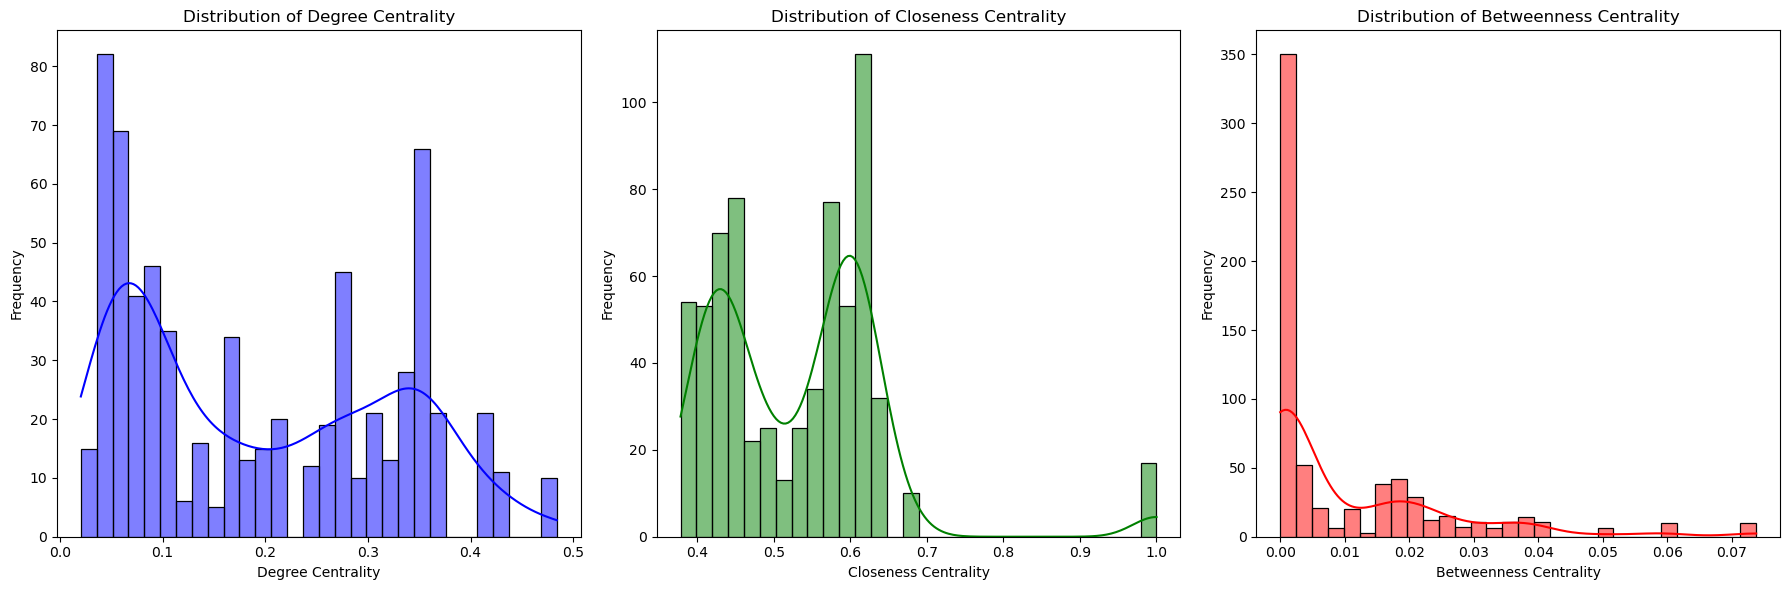

In [486]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(centrality_marvel_data['degree_centrality'], kde=True, color='blue', bins=30)
plt.title('Distribution of Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(centrality_marvel_data['closeness_centrality'], kde=True, color='green', bins=30)
plt.title('Distribution of Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(centrality_marvel_data['betweenness_centrality'], kde=True, color='red', bins=30)
plt.title('Distribution of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


###### Normalisation des Mesures de Centralité

In [491]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

columns_to_scale = ['degree_centrality', 'closeness_centrality', 'betweenness_centrality']
centrality_marvel_data[columns_to_scale]=scaler.fit_transform(centrality_marvel_data[columns_to_scale])
final_data=centrality_marvel_data

In [492]:
centrality_marvel_data.describe()

,Hero_id,degree_centrality,closeness_centrality,betweenness_centrality,villain
count,674.000000,674.000000,674.000000,674.000000,674.000000
mean,174.617211,0.373526,0.246599,0.144479,0.094955
std,99.232772,0.279965,0.183323,0.211021,0.293371
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,0.100000,0.097445,0.000000,0.000000
50%,171.500000,0.300000,0.265489,0.033113,0.000000
75%,261.750000,0.637500,0.367139,0.250577,0.000000
max,345.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


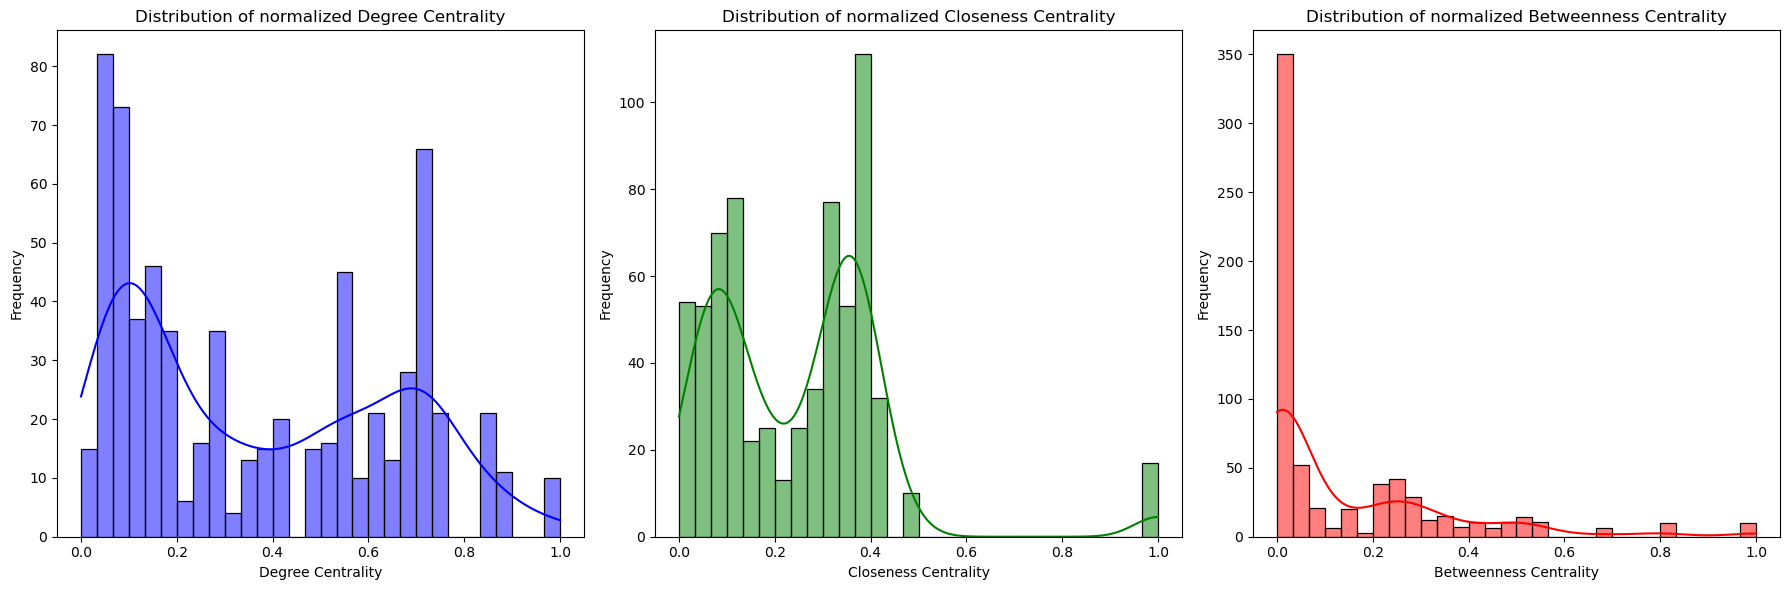

In [493]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
sns.histplot(final_data['degree_centrality'], kde=True, color='blue', bins=30)
plt.title('Distribution of normalized Degree Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2) 
sns.histplot(final_data['closeness_centrality'], kde=True, color='green', bins=30)
plt.title('Distribution of normalized Closeness Centrality')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(final_data['betweenness_centrality'], kde=True, color='red', bins=30)
plt.title('Distribution of normalized Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [494]:
df_to_ohe=centrality_marvel_data.copy()

In [495]:
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

In [496]:
#codification des valeurs de la variable Movie avec le One Hot Encoding
df_ohe=ohe.fit_transform(df_to_ohe[['Movie']])

In [497]:
df_encoded=pd.concat([centrality_marvel_data,df_ohe],axis=1).drop(columns=['Movie'])
df_encoded

,Hero_id,Hero_name,Affiliation,degree_centrality,closeness_centrality,betweenness_centrality,villain,Movie_Ant-Man,Movie_Ant-Man and the Wasp,Movie_Ant-Man and the Wasp: Quantumania,...,Movie_Marvels The Avengers,Movie_Shang-Chi and the Legend of the Ten Rings,Movie_Spider-Man: Far From Home,Movie_Spider-Man: Homecoming,Movie_Spider-Man: No Way Home,Movie_The Incredible Hulk,Movie_Thor,Movie_Thor: Love and Thunder,Movie_Thor: Ragnarok,Movie_Thor: The Dark World
0,0,Aaron Davis,Unnafiliated,0.16875,0.101235,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Abomination,Unnafiliated,0.10000,0.106996,0.012033,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,Abomination,Unnafiliated,0.10000,0.106996,0.012033,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,Abraham,Unnafiliated,0.16875,0.101235,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,Abraham Erskine,Unnafiliated,0.05625,0.089986,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,342,Yon-Rogg,Starforce,0.06875,0.131009,0.000000,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
670,343,Yondu Udonta,Guardians of the Galaxy,0.18750,0.046724,0.004841,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,343,Yondu Udonta,Guardians of the Galaxy,0.18750,0.046724,0.004841,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,344,Zeus,Unnafiliated,0.15625,0.062516,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###### Groupage par Hero_id, Hero_name et Affiliation

In [498]:
movies_colums= [col for col in df_encoded.columns if col.startswith('Movie_')]
df_aggregated=df_encoded.groupby(['Hero_id', 'Hero_name', 'Affiliation','villain','degree_centrality','closeness_centrality','betweenness_centrality'])[movies_colums].max().reset_index()

In [499]:
df_aggregated

,Hero_id,Hero_name,Affiliation,villain,degree_centrality,closeness_centrality,betweenness_centrality,Movie_Ant-Man,Movie_Ant-Man and the Wasp,Movie_Ant-Man and the Wasp: Quantumania,...,Movie_Marvels The Avengers,Movie_Shang-Chi and the Legend of the Ten Rings,Movie_Spider-Man: Far From Home,Movie_Spider-Man: Homecoming,Movie_Spider-Man: No Way Home,Movie_The Incredible Hulk,Movie_Thor,Movie_Thor: Love and Thunder,Movie_Thor: Ragnarok,Movie_Thor: The Dark World
0,0,Aaron Davis,Unnafiliated,0,0.16875,0.101235,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Abomination,Unnafiliated,1,0.10000,0.106996,0.012033,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,Abraham,Unnafiliated,0,0.16875,0.101235,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Abraham Erskine,Unnafiliated,0,0.05625,0.089986,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Agent 13,Unnafiliated,0,0.08125,0.119806,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,341,Ying Nan,Unnafiliated,0,0.06250,0.076418,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,342,Yon-Rogg,Starforce,1,0.06875,0.131009,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,343,Yondu Udonta,Guardians of the Galaxy,0,0.18750,0.046724,0.004841,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,344,Zeus,Unnafiliated,0,0.15625,0.062516,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [500]:
#suppression des collonnes inutiles
df_aggregated=df_aggregated.drop(['Hero_name','Hero_id','Affiliation'],axis=1)
df_final=df_aggregated.copy()

#### DataSet Final

In [501]:
df_final

,villain,degree_centrality,closeness_centrality,betweenness_centrality,Movie_Ant-Man,Movie_Ant-Man and the Wasp,Movie_Ant-Man and the Wasp: Quantumania,Movie_Avengers: Age of Ultron,Movie_Avengers: Endgame,Movie_Avengers: Infinity War,...,Movie_Marvels The Avengers,Movie_Shang-Chi and the Legend of the Ten Rings,Movie_Spider-Man: Far From Home,Movie_Spider-Man: Homecoming,Movie_Spider-Man: No Way Home,Movie_The Incredible Hulk,Movie_Thor,Movie_Thor: Love and Thunder,Movie_Thor: Ragnarok,Movie_Thor: The Dark World
0,0,0.16875,0.101235,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.10000,0.106996,0.012033,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.16875,0.101235,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.05625,0.089986,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.08125,0.119806,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0,0.06250,0.076418,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,1,0.06875,0.131009,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,0,0.18750,0.046724,0.004841,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
345,0,0.15625,0.062516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###### Création des sous-ensemble de données pour entrainer mes 3 modeles

   - Model_1 est le modele avec la colone movie et celles des mesures de centralité  (M1_df)
   - Model_2 est le modele avec la colone movie uniquement  (M2_df)
   - Model_1 est le modele avec les mesures de centralité uniquement  (M3_df)

In [502]:
M1_df=df_final.copy() #pour le modele avec la colone movie et celles des mesures de centralité
M2_df=df_final.drop(['degree_centrality','closeness_centrality','betweenness_centrality'],axis=1) #le modele avec la colone movie uniquement
M3_df=df_final.drop(df_final.columns[4:],axis=1) # le modele avec les mesures de centralité uniquement

In [503]:
M3_df

,villain,degree_centrality,closeness_centrality,betweenness_centrality
0,0,0.16875,0.101235,0.000000
1,1,0.10000,0.106996,0.012033
2,0,0.16875,0.101235,0.000000
3,0,0.05625,0.089986,0.000000
4,0,0.08125,0.119806,0.000000
...,...,...,...,...
342,0,0.06250,0.076418,0.000000
343,1,0.06875,0.131009,0.000000
344,0,0.18750,0.046724,0.004841
345,0,0.15625,0.062516,0.000000




## 3.2. Construire le modèle/Building the model (2 points)


Maintenant, utilisez votre créativité pour construire un modèle pour prédire les méchants dans l'ensemble de données, à partir des fonctionnalités que vous avez créées. Voici quelques points pour vous guider :

1. Des démonstrations graphiques seront appréciées. Ne vous contentez pas de prédire vos données, affichez vos valeurs de manière agréable.
2. Expliquez vos résultats. L'ajout des fonctionnalités de centralité aide-t-il votre modèle d'une manière ou d'une autre? Les films aident-ils votre modèle? Si vous ne deviez garder qu'un seul des deux sous-ensembles, lequel garderiez-vous?

---

Now, use your creativity to build a model to predict the villains in the dataset, from the features that you have created. Here are some points to guide you:

1. Graphical demonstrations will be appreciated. Do not just predict your data, show your values in a pleasant way. 
2. Explain your results. Does the addition of the centrality features help your model somehow? Do the movies help your model? If you had to keep just one of the two subsets, which one would you keep?

In [504]:
## Mettez votre code ici

## Insert your code here

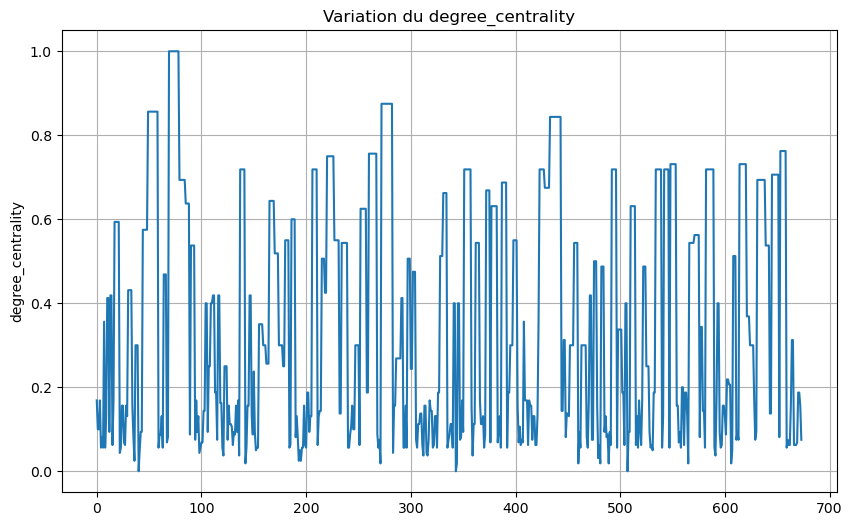

La variable degree_centrality varie considerablement


In [505]:
import matplotlib.pyplot as plt

variance_centralities=df_encoded[['degree_centrality']]

plt.figure(figsize=(10,6))
plt.plot(variance_centralities.index,variance_centralities.values)
plt.ylabel('degree_centrality')
plt.title('Variation du degree_centrality')
plt.grid(True)
plt.show()

print('La variable degree_centrality varie considerablement')

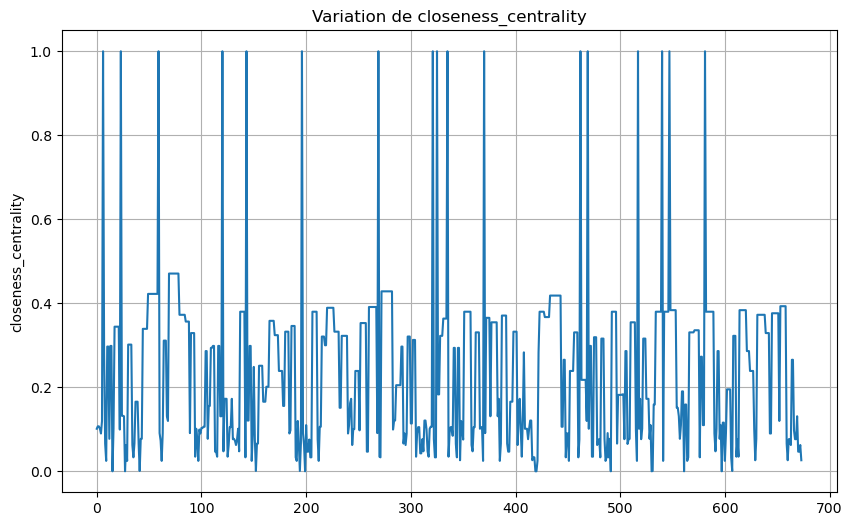

La variable closeness_centrality varie considerablement


In [506]:
import matplotlib.pyplot as plt

variance_centralities=df_encoded[['closeness_centrality']]

plt.figure(figsize=(10,6))
plt.plot(variance_centralities.index,variance_centralities.values)
plt.ylabel('closeness_centrality')
plt.title('Variation de closeness_centrality')
plt.grid(True)
plt.show()

print('La variable closeness_centrality varie considerablement')

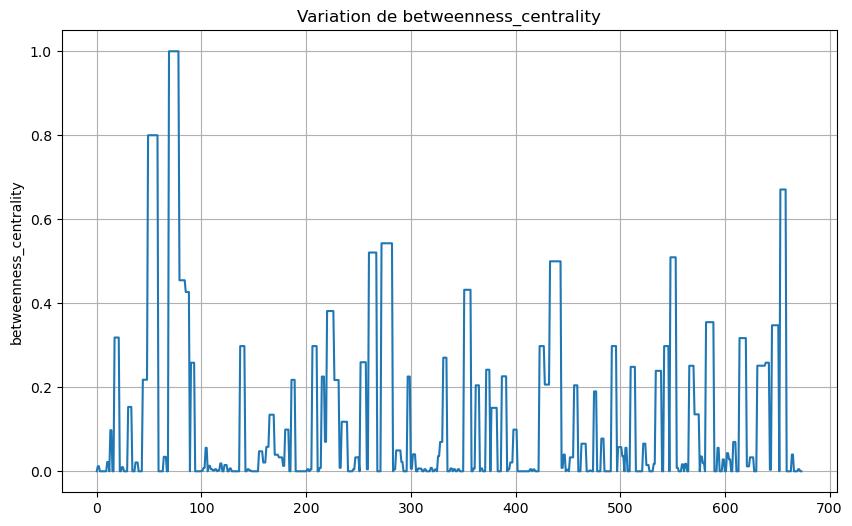

La variable betweenness_centrality varie considerablement


In [507]:
import matplotlib.pyplot as plt

variance_centralities=df_encoded[['betweenness_centrality']]

plt.figure(figsize=(10,6))
plt.plot(variance_centralities.index,variance_centralities.values)
plt.ylabel('betweenness_centrality')
plt.title('Variation de betweenness_centrality')
plt.grid(True)
plt.show()

print('La variable betweenness_centrality varie considerablement')

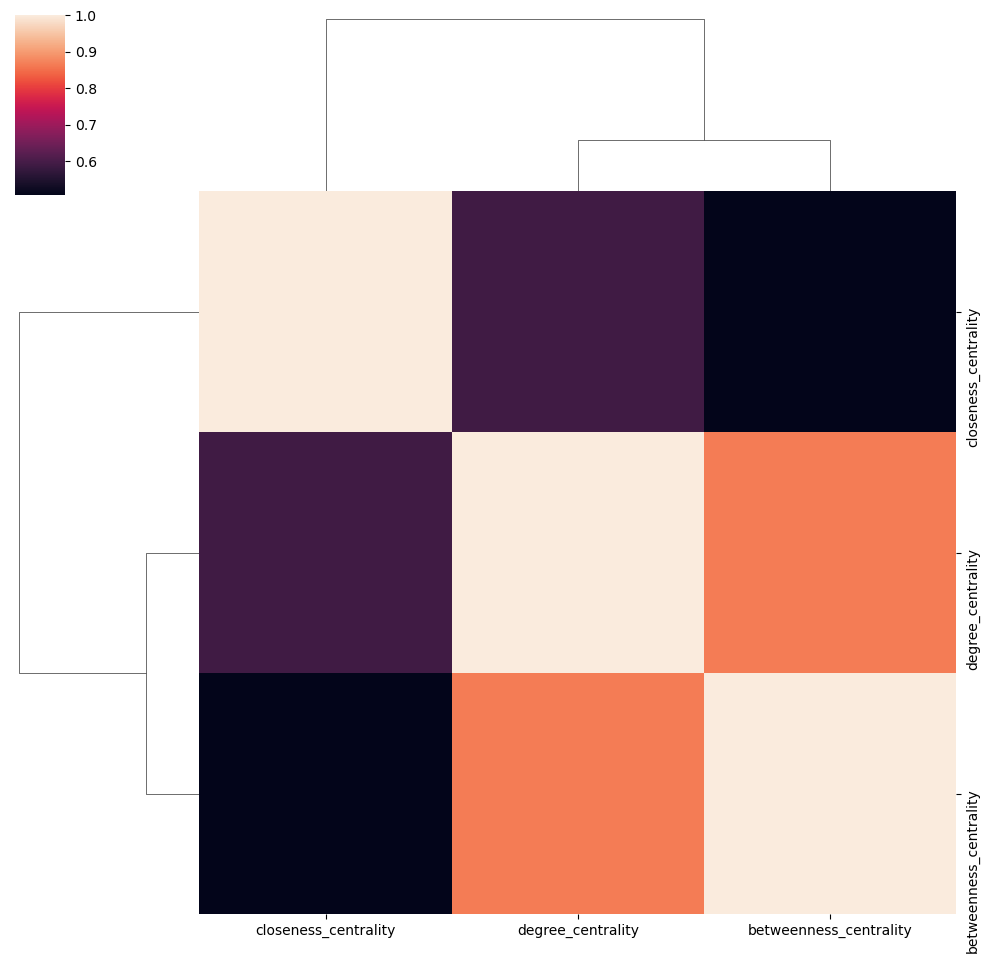

In [508]:
sns.clustermap(df_encoded[['degree_centrality','closeness_centrality','betweenness_centrality']].corr())

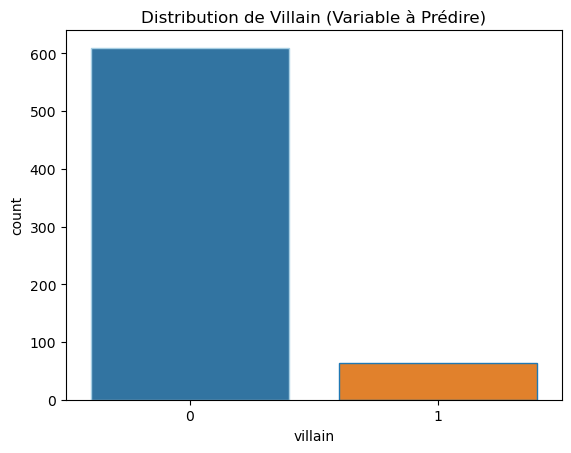

Nous avons un dataset où la variable cible présente des classes déséquilibrées. Nous allons appliquer la technique SMOTE à notre modèle (XGBoost) pour remédier à ce déséquilibre.


In [509]:
data=df_encoded.copy()

sns.countplot(x='villain',data=df_encoded,edgecolor=sns.color_palette('Paired'), order=df_encoded['villain'].value_counts().index)
plt.title('Distribution de Villain (Variable à Prédire)')
plt.show()

print('Nous avons un dataset où la variable cible présente des classes déséquilibrées. Nous allons appliquer la technique SMOTE à notre modèle (XGBoost) pour remédier à ce déséquilibre.')


In [510]:
#pip install pandas scikit-learn imbalanced-learn xgboost

In [511]:
from sklearn.model_selection import train_test_split, learning_curve
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

In [512]:
def evaluate_and_train(data, target='villain'):
    
    X = data.drop(target, axis=1)
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    scale_pos_weight = len(y_train_resampled) / sum(y_train_resampled == 1)
    model = make_pipeline(PolynomialFeatures(1),xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight))
    model.fit(X_train_resampled, y_train_resampled)
    
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    
    N, train_score, val_score = learning_curve(model, X_train_resampled, y_train_resampled,
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.show()

###### Modele 1:  avec toutes les variables

MODELE AVEC L'ENSEMBLE LES MESURES DE CENTRALITES ET MOVIE
[[57  6]
 [ 6  1]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.14      0.14      0.14         7

    accuracy                           0.83        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.83      0.83      0.83        70



C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\skl

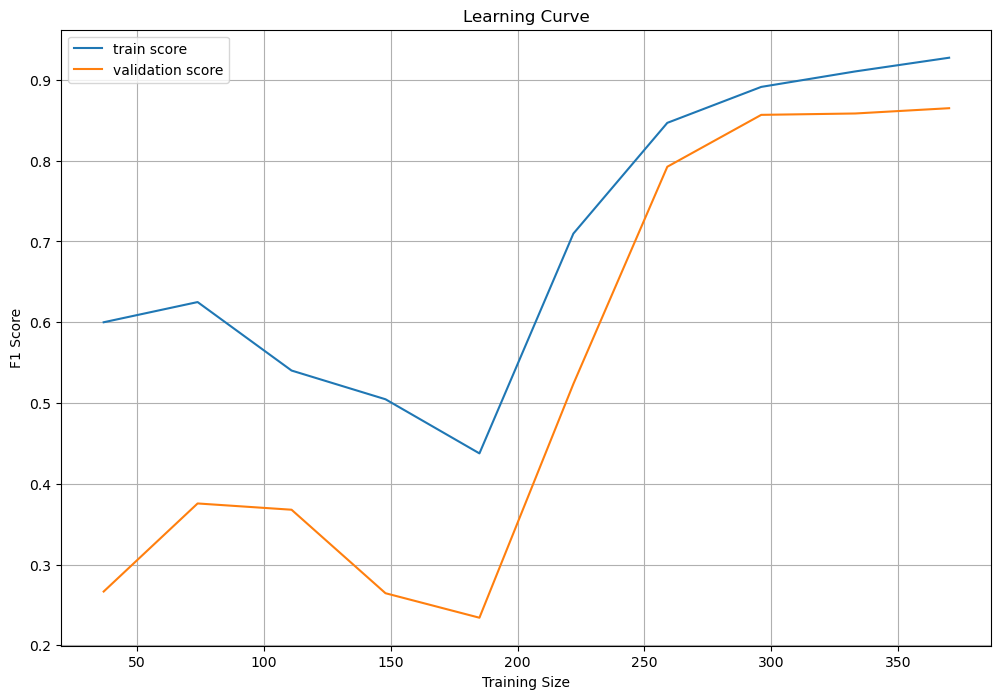

In [513]:
modele_1, X_train1, y_train1, X_test1, y_test1 = preprocess_and_train(M1_df)
print("MODELE AVEC L'ENSEMBLE LES MESURES DE CENTRALITES ET MOVIE")
evaluate_and_train(M1_df)

###### Modele 2:  avec movie

MODELE AVEC LA VARIABLE MOVIE
[[59  4]
 [ 7  0]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.00      0.00      0.00         7

    accuracy                           0.84        70
   macro avg       0.45      0.47      0.46        70
weighted avg       0.80      0.84      0.82        70



C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\skl

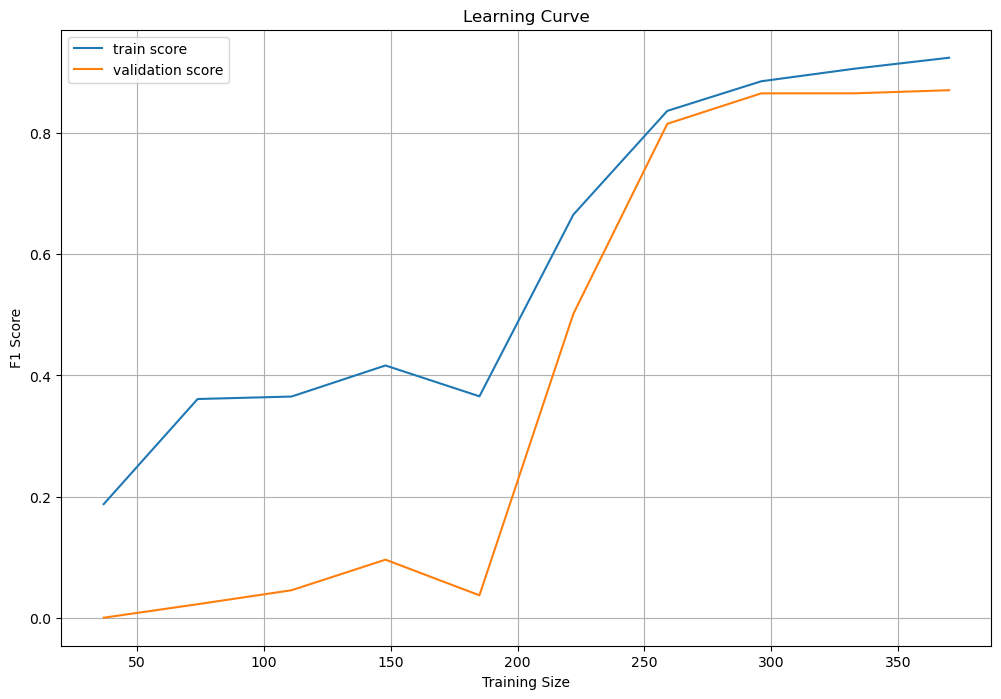

In [514]:
modele_2, X_train2, y_train2, X_test2, y_test2 = preprocess_and_train(M2_df)
print("MODELE AVEC LA VARIABLE MOVIE")
evaluate_and_train(M2_df)

###### Modele 3:  avec les mesures de centralité

MODELE AVEC LES MESURES DE CENTRALITES
[[55  8]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        63
           1       0.20      0.29      0.24         7

    accuracy                           0.81        70
   macro avg       0.56      0.58      0.56        70
weighted avg       0.84      0.81      0.83        70



C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\skl

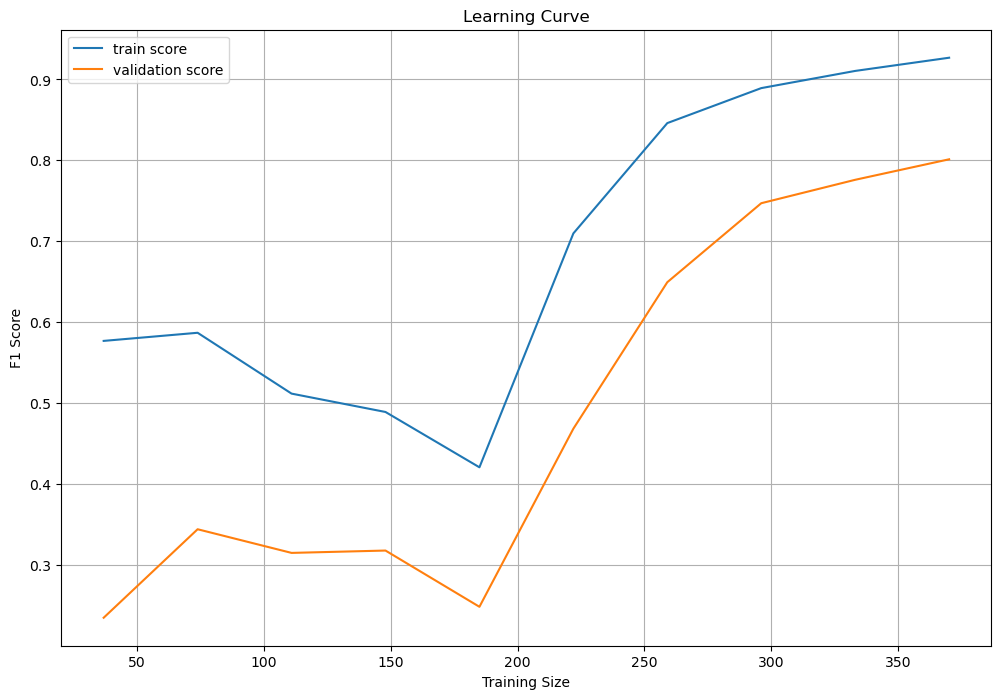

In [515]:
modele_3, X_train3, y_train3, X_test3, y_test3 = preprocess_and_train(M3_df)
print("MODELE AVEC LES MESURES DE CENTRALITES")
evaluate_and_train(M3_df)

### Modèle avec l'ensemble des mesures de centralités et Movie

Le modèle utilisant l'ensemble des mesures de centralités et la variable Movie montre une performance équilibrée pour la classe `0` (non-méchant) avec une précision et un rappel élevés. Cependant, pour la classe `1` (méchant), la précision et le rappel sont faibles, ce qui indique que le modèle a des difficultés à identifier correctement les méchants.

- **F1 Score**: 0.14 pour les méchants
- **Précision**: 0.14
- **Rappel**: 0.14
- **Accuracy**: 0.83

### Modèle avec la variable Movie

Le modèle utilisant uniquement la variable Movie présente des résultats très déséquilibrés. La précision et le rappel pour la classe `0` (non-méchant) sont élevés, mais pour la classe `1` (méchant), ils sont extrêmement faibles. Cela signifie que le modèle ne parvient pas du tout à identifier les méchants.

- **F1 Score**: 0.00 pour les méchants
- **Précision**: 0.00
- **Rappel**: 0.00
- **Accuracy**: 0.84

### Modèle avec les mesures de centralités

Le modèle utilisant uniquement les mesures de centralités montre une amélioration par rapport au modèle combinant les mesures de centralités et la variable Movie. La précision et le rappel pour la classe `1` (méchant) sont significativement meilleurs, bien qu'ils ne soient pas aussi bons que ceux de la classe `0` (non-méchant).

- **F1 Score**: 0.24 pour les méchants
- **Précision**: 0.20
- **Rappel**: 0.29
- **Accuracy**: 0.81

### Conclusion

En conclusion, le modèle utilisant uniquement les mesures de centralités offre de meilleures performances que le modèle combinant les mesures de centralités et la variable Movie. La variable Movie seule n'apporte pas suffisamment d'informations pour une classification efficace. Pour améliorer davantage le modèle avec les mesures de centralités, nous allons utiliser GridSearchCV.


#### optimisation du Modele basé sur les mesures de centralités

In [516]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [517]:
def evaluate_and_train_and_optimisation(data, target='villain'):

    X = data.drop(target, axis=1)
    y = data[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    param_grid = {
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 100, 200],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2]
    }
    
    scale_pos_weight = len(y_train_resampled) / sum(y_train_resampled == 1)
    grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight), param_grid, cv=5, scoring='f1', n_jobs=-1)
    
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    print("Best parameters found: ", grid_search.best_params_)
    
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    
    N, train_score, val_score = learning_curve(best_model, X_train_resampled, y_train_resampled,
                                               cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.grid(True)
    plt.show()


MODELE 3 OPTIMISE
Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.8}
[[56  7]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.22      0.29      0.25         7

    accuracy                           0.83        70
   macro avg       0.57      0.59      0.58        70
weighted avg       0.85      0.83      0.84        70



C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\gpres\anaconda3\Lib\site-packages\skl

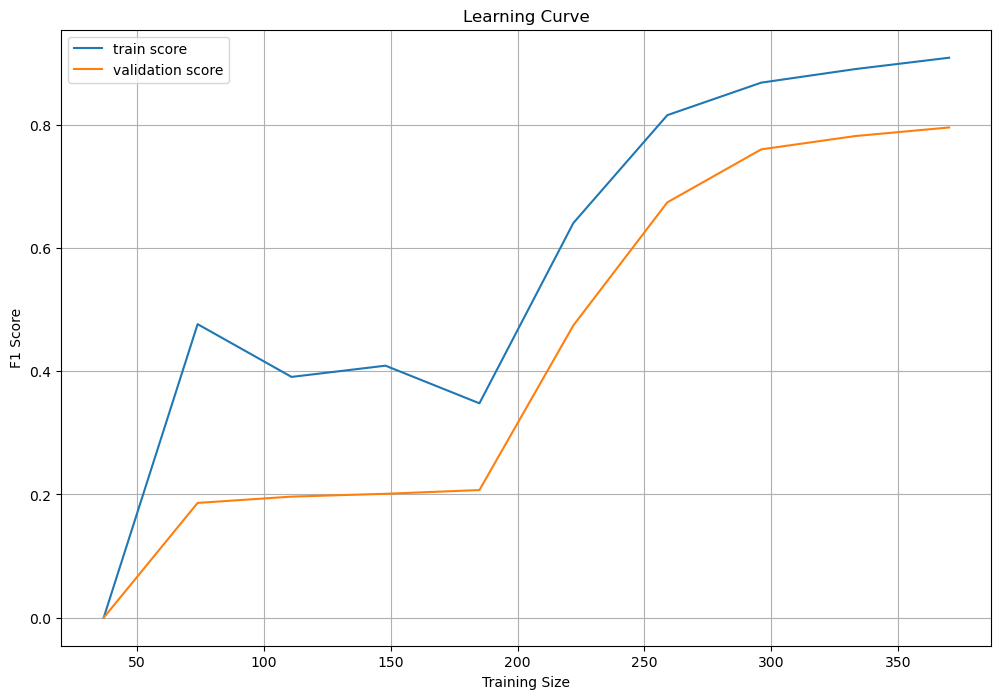

In [518]:

print("MODELE 3 OPTIMISE")

evaluate_and_train_and_optimisation(M3_df)

### Modèle 3 optimisé

Le modèle 3 optimisé utilisant uniquement les mesures de centralités montre une amélioration notable des performances globales. Cependant, en ce qui concerne la classe `1` (méchant), bien que la précision soit améliorée, le modèle avec uniquement les mesures de centralités a un meilleur rappel, ce qui est crucial pour identifier un certain nombre des méchants.

- **F1 Score**: 0.25 pour les méchants
- **Précision**: 0.22
- **Rappel**: 0.29
- **Accuracy**: 0.83

### Conclusion

En conclusion, bien que le modèle 3 optimisé (avec uniquement les mesures de centralités) offre de bonnes performances globales comparé aux autres modeles précédents. L'optimisation des hyperparamètres a permis d'améliorer la précision et le rappel globalement, mais ce resultat n'est pas suffisant pour identifier tous les mechant.

Pour ameliorer ce travail, un dataset plus grand et l'ajout de d'autres variables seraient un atout.